In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.optimize import minimize

In [3]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

In [4]:
def guessCritPt(x_l,y_l):
    mid_pt = np.max(y_l)/2
    mid_idx = np.argmin(np.abs(y_l-mid_pt))
    return x_l[mid_idx] - y_l[mid_idx]*(x_l[mid_idx+1]-x_l[mid_idx-1])/(y_l[mid_idx+1]-y_l[mid_idx-1])

def finiteScaling(x_l,y_l,ct_pt,nu,beta,max_size):
    # return (x_l-ct_pt)*(max_size**(1/nu)), y_l*(max_size**(2*beta/nu))
    return (x_l-ct_pt)*(max_size**(1/nu))*(max_size**(-2*beta/nu)), y_l

def finiteScalingCost(param,x_arr,y_arr,max_size_l,num_interp):
    # ct_pt = param[0]
    # nu = param[1]
    # beta = param[2]

    ct_pt = 1
    nu = param[0]
    beta = 0
    
    n_exp = x_arr.shape[0]

    target_x, target_y = finiteScaling(x_arr[-1,:],y_arr[-1,:],ct_pt,nu,beta,max_size_l[-1])
    
    cost = 0
    for i in range(n_exp-1):
        scaled_x, scaled_y = finiteScaling(x_arr[i,:],y_arr[i,:],ct_pt,nu,beta,max_size_l[i])
        interp_x = np.linspace(scaled_x[0],scaled_x[-1],num_interp)
        interp_y = np.interp(interp_x,scaled_x,scaled_y)
        interp_target_y = np.interp(interp_x,target_x,target_y)
        cost = cost + np.linalg.norm(interp_target_y-interp_y)
    
    return cost

def finiteScalingCB(param):
    print(param)

### Cluster State
parallel strings connecting A & C

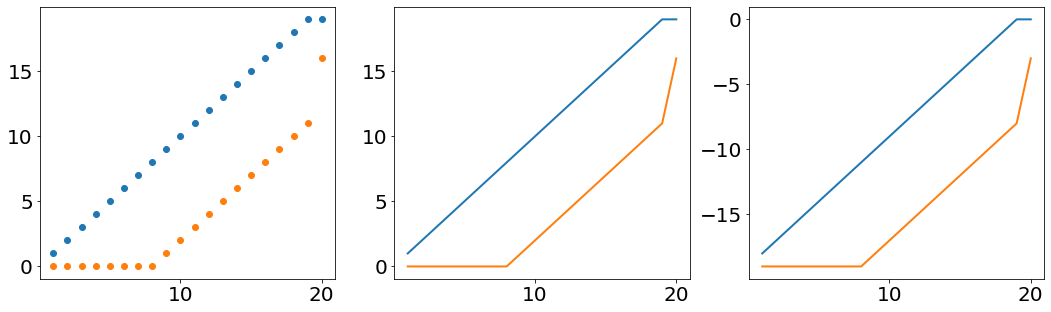

In [11]:
plt.rcParams["figure.figsize"] = (18,5)

for i in range(2,4):
    raw = np.loadtxt("../data/230428/230428_%d_cmi.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,1)
    plt.scatter(raw[:,0],raw[:,1])
    raw = np.loadtxt("../data/230428/230428_%d_mi.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,2)
    plt.plot(raw[:,0],raw[:,1])
    raw = np.loadtxt("../data/230428/230428_%d_ci.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,3)
    plt.plot(raw[:,0],raw[:,1])

# xmin = 0
# plt.subplot(1,3,1)
# plt.xlim([xmin,1])
# plt.xlabel("% measurements")
# plt.ylabel("MIE")
# plt.subplot(1,3,2)
# plt.xlim([xmin,1])
# plt.xlabel("% measurements")
# plt.ylabel("MI")
# plt.subplot(1,3,3)
# plt.xlim([xmin,1])
# plt.xlabel("% measurements")
# plt.ylabel("CI")
# plt.tight_layout()

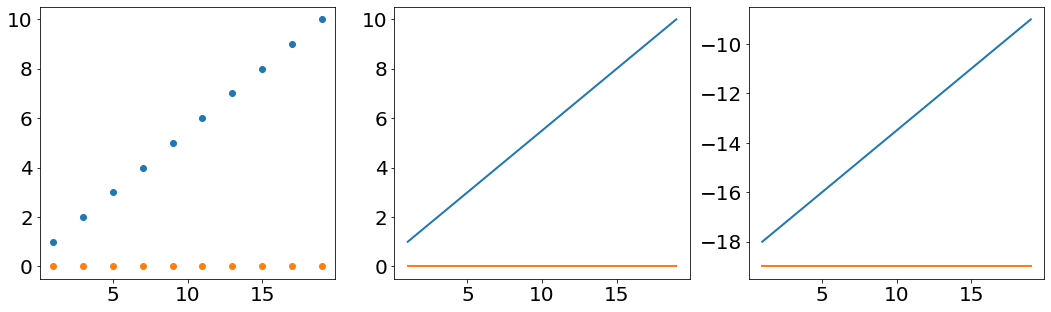

In [12]:
plt.rcParams["figure.figsize"] = (18,5)

for i in range(4,6):
    raw = np.loadtxt("../data/230428/230428_%d_cmi.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,1)
    plt.scatter(raw[:,0],raw[:,1])
    raw = np.loadtxt("../data/230428/230428_%d_mi.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,2)
    plt.plot(raw[:,0],raw[:,1])
    raw = np.loadtxt("../data/230428/230428_%d_ci.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,3)
    plt.plot(raw[:,0],raw[:,1])

# xmin = 0
# plt.subplot(1,3,1)
# plt.xlim([xmin,1])
# plt.xlabel("% measurements")
# plt.ylabel("MIE")
# plt.subplot(1,3,2)
# plt.xlim([xmin,1])
# plt.xlabel("% measurements")
# plt.ylabel("MI")
# plt.subplot(1,3,3)
# plt.xlim([xmin,1])
# plt.xlabel("% measurements")
# plt.ylabel("CI")
# plt.tight_layout()

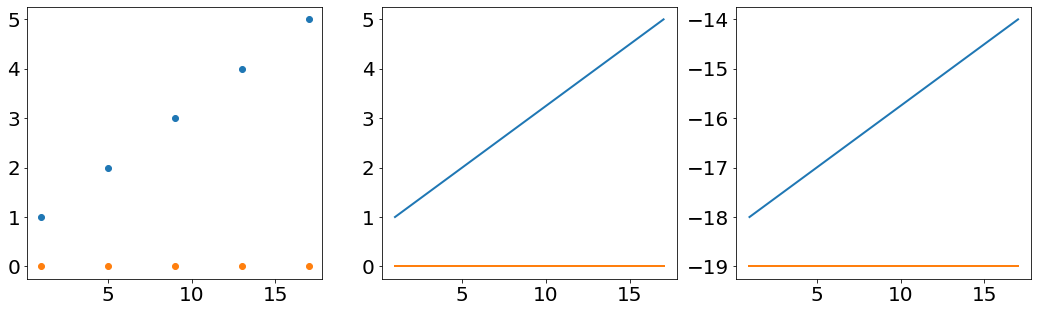

In [17]:
plt.rcParams["figure.figsize"] = (18,5)

for i in range(6,8):
    raw = np.loadtxt("../data/230428/230428_%d_cmi.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,1)
    plt.scatter(raw[:,0],raw[:,1])
    raw = np.loadtxt("../data/230428/230428_%d_mi.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,2)
    plt.plot(raw[:,0],raw[:,1])
    raw = np.loadtxt("../data/230428/230428_%d_ci.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,3)
    plt.plot(raw[:,0],raw[:,1])

# xmin = 0
# plt.subplot(1,3,1)
# plt.xlim([xmin,1])
# plt.xlabel("% measurements")
# plt.ylabel("MIE")
# plt.subplot(1,3,2)
# plt.xlim([xmin,1])
# plt.xlabel("% measurements")
# plt.ylabel("MI")
# plt.subplot(1,3,3)
# plt.xlim([xmin,1])
# plt.xlabel("% measurements")
# plt.ylabel("CI")
# plt.tight_layout()

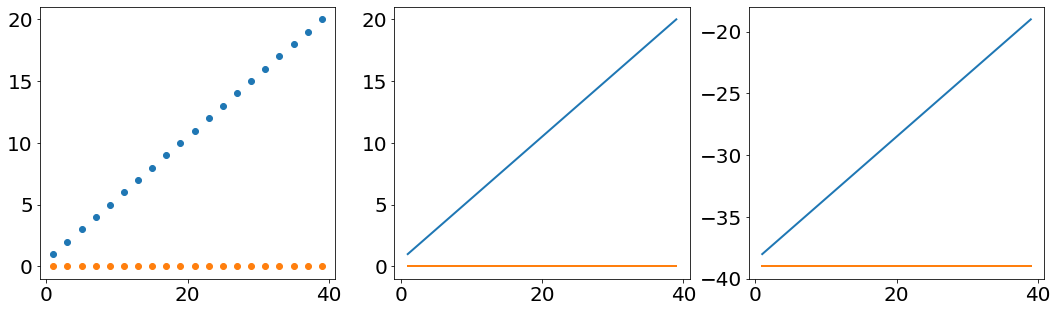

In [38]:
plt.rcParams["figure.figsize"] = (18,5)

for i in range(14,16):
    raw = np.loadtxt("../data/230428/230428_%d_cmi.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,1)
    plt.scatter(raw[:,0],raw[:,1])
    raw = np.loadtxt("../data/230428/230428_%d_mi.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,2)
    plt.plot(raw[:,0],raw[:,1])
    raw = np.loadtxt("../data/230428/230428_%d_ci.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,3)
    plt.plot(raw[:,0],raw[:,1])

# xmin = 0
# plt.subplot(1,3,1)
# plt.xlim([xmin,1])
# plt.xlabel("% measurements")
# plt.ylabel("MIE")
# plt.subplot(1,3,2)
# plt.xlim([xmin,1])
# plt.xlabel("% measurements")
# plt.ylabel("MI")
# plt.subplot(1,3,3)
# plt.xlim([xmin,1])
# plt.xlabel("% measurements")
# plt.ylabel("CI")
# plt.tight_layout()

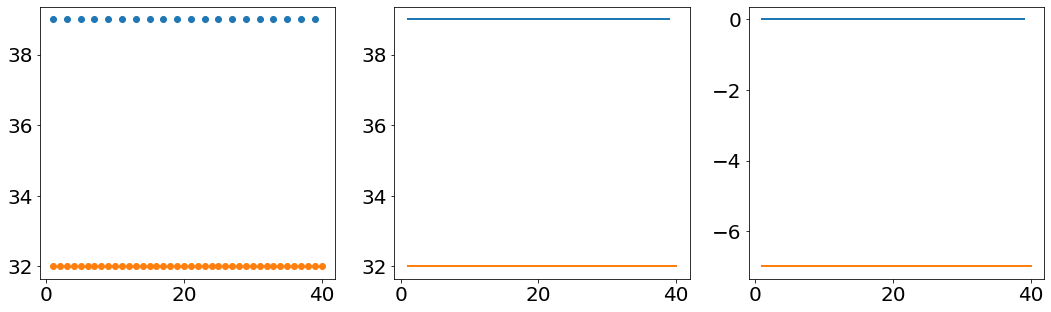

In [40]:
plt.rcParams["figure.figsize"] = (18,5)

for i in range(16,18):
    raw = np.loadtxt("../data/230428/230428_%d_cmi.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,1)
    plt.scatter(raw[:,0],raw[:,1])
    raw = np.loadtxt("../data/230428/230428_%d_mi.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,2)
    plt.plot(raw[:,0],raw[:,1])
    raw = np.loadtxt("../data/230428/230428_%d_ci.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,3)
    plt.plot(raw[:,0],raw[:,1])

# xmin = 0
# plt.subplot(1,3,1)
# plt.xlim([xmin,1])
# plt.xlabel("% measurements")
# plt.ylabel("MIE")
# plt.subplot(1,3,2)
# plt.xlim([xmin,1])
# plt.xlabel("% measurements")
# plt.ylabel("MI")
# plt.subplot(1,3,3)
# plt.xlim([xmin,1])
# plt.xlabel("% measurements")
# plt.ylabel("CI")
# plt.tight_layout()